<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Vitales, Nicole Keith D.<br>
    Student Number: 201912768 <br>
   Section: 58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

-          What are Babang's monthly revenues, costs, and profits?

-          How much profit did Bebang get for each flavor? And which are the top 3 and bottom 3 flavors?

-          Is there anything Bebang could improve on marketing or advertising? Bebang know there are big dips in the sales so she want to know of what she can do.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [1]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [2]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [3]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor')) # this is the sales dataframe that is converted to an array
prices_mat1 = np.array(df_prices)[0] # this is the prices dataframe that is converted to an array wherein [0] 
costs_mat1 = np.array(df_prices)[1] # is the value of the first array item and [1] the second array item that array is getting

prices_mat = prices_mat1.reshape(12,1)  # the first array and second array item that has been reshape
costs_mat = costs_mat1.reshape(12,1) # to get the shape of (12, 1) to make it a column to multiply in the sales dataframe

## Do not alter these lines
print(sales_mat.shape) # prints the shape of sales_mat variable
print(prices_mat.shape) # prints the shape of prices_mat variable
print(costs_mat.shape) # prints the shape of costs_mat variable
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


# Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [4]:
revenue_month = (sales_mat*prices_mat) # getting the revenue by multiplying the sales and prices per piece of flavor
cost_sold_month = (sales_mat*costs_mat) # getting the cost sold by multiplying sales and cost per piece

In [5]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales): # the function that has been created
    monthly_revenue = revenue_month.sum(axis=0) # after multiply get the sum per month 
    monthly_costs = cost_sold_month.sum(axis=0) # the (axis=0) means getting the sum of per column
    monthly_profits = monthly_revenue-monthly_costs # than subtract to get monthly profits
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten() # returns the value

In [6]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

# this for the order of the output will be shown
list_of_months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')
rev = {'\tMonthly Revenue'}
costs = {'\t\tMonthly Cost'}
profits = {'\t\tMonthly Profit'}

# this is for presenting the output without typing one by one
for r, c, p in zip(rev, costs, profits):
    print(r + c + p)
    
for month_list, monthly_revenue, monthly_cost, monthly_profit in zip(list_of_months, month_rev, month_cost, month_profit):
    print(f'{month_list}\t{monthly_revenue}\t\t\t{monthly_cost}\t\t\t{monthly_profit}')

	Monthly Revenue		Monthly Cost		Monthly Profit
Jan	236825			157454			79371
Feb	175530			116322			59208
Mar	159045			105195			53850
Apr	30335			20334			10001
May	150085			97261			52824
June	16735			11208			5527
July	17970			12372			5598
Aug	16995			11497			5498
Sept	14960			9926			5034
Oct	21590			14377			7213
Nov	213655			137107			76548
Dec	347365			230209			117156


## Part 2: Flavor Sales

In [7]:
#This is for revenue formula for flavor
rev_cost_flavor = sales_mat.sum(axis=1) # getting the sum of per flavor, the (axis=1) means by rows
rev_cost_reshape = np.reshape(rev_cost_flavor, (1, 12)) # reshaping by (1, 12) to multiply per flavor and making a 2d array

In [12]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = rev_cost_reshape.T*prices_mat # multiplying the reshape to prices per piece to get the revenue per flavor
    flavor_costs = rev_cost_reshape.T*costs_mat # same goes to this line to get the costr per flavor
    flavor_profits = flavor_revenue-flavor_costs # subtracting the revenue and cost to get the profit per flavor
    return flavor_profits.flatten() # returns the value

In [13]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values

df_sales['Profit per Flavor'] = flavor_profit # adding a new column in the dataframe sales and naming it profit per flavor
column_sales = df_sales[['flavor', 'Profit per Flavor']] #  this gets only two columns which are the flavor and the new column
column_sales # prints the flavor and the new column that has been created

,flavor,Profit per Flavor
0,red velvet,41370
1,oreo,19040
2,sugar glazed,53260
3,almond honey,23715
4,matcha,61245
5,strawberry cream,18387
6,brown sugar boba,30660
7,furits and nuts,39820
8,dark chocolate,44790
9,chocolate and orange,27615


In [11]:
selling_flavors = column_sales.sort_values(by=['Profit per Flavor'], ascending=False) # this sort the previous output

In [12]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = selling_flavors.iloc[0:3] # gets the 3 top flavors
worst_3_flavors = selling_flavors.iloc[9:12] # this gets the bottom flavor

print(f'The 3 best-selling flavors:\n\n {best_3_flavors}') # prints the best selling flavor
print(f'\nThe 3 least-selling flavors:\n\n {worst_3_flavors}') # prints the least selling flavor

The 3 best-selling flavors:

                  flavor  Profit per Flavor
11  choco butter naught              91770
4                matcha              61245
2          sugar glazed              53260

The 3 least-selling flavors:

              flavor  Profit per Flavor
3      almond honey              23715
1              oreo              19040
5  strawberry cream              18387


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

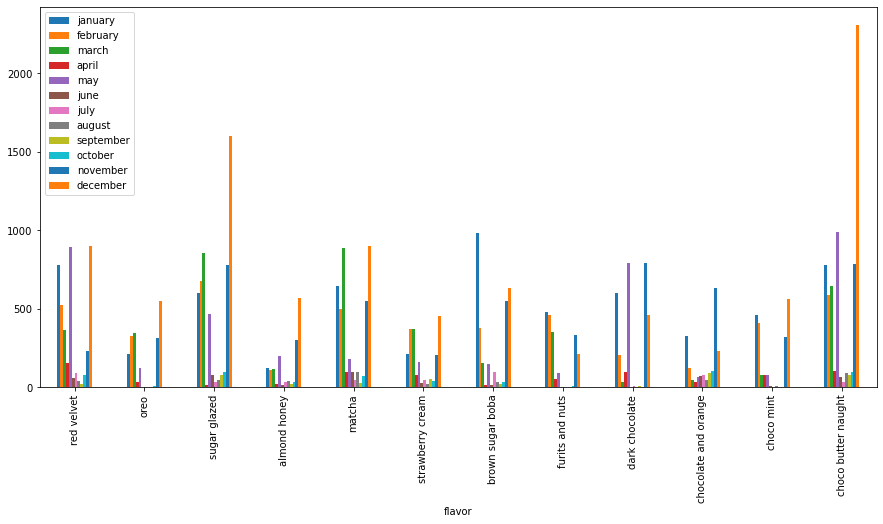

In [18]:
df_sales.plot(x="flavor", kind="bar", figsize=(15, 7)) # it plots the sales dataframe

#### Monthly Sales

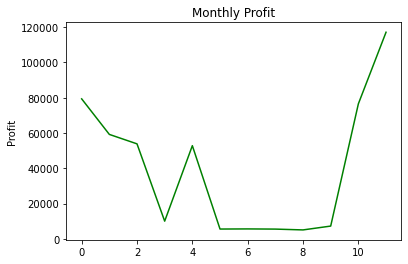

In [14]:
plt.title("Monthly Profit") # the title of the graph
plt.ylabel("Profit")  # the y label 
plt.plot(month_profit, color ="green") # this is the needed to be plot which is the monthly profit that had been plot
plt.show() # this shows the plot

#### Flavor Sales

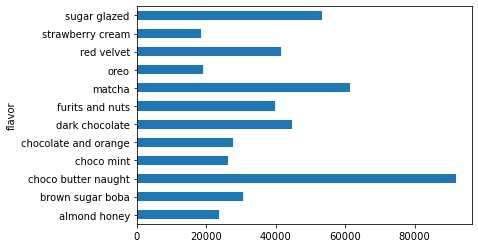

In [15]:
per_sale_flavor = df_sales.groupby("flavor")["Profit per Flavor"].sum() # it gets the the flavor and Profit per Flavor
per_sale_flavor.plot(kind="barh", fontsize=10) # this plots the graph

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

<p><div style="text-align: justify">In part 1 of the data analysis in the cell after the part 1 monthly sale header, reshaping the vector is a big help for it to use the given formula on how to solve the revenue, cost sold and the profit of each month, that will be seen of the output in part 1 monthly sales. In part 2 because it had already been reshaped in part 1 same goes for how to solve the flavor revenue, flavor cost, and flavor profit of the formula, but the difference is while in part 1 it gets the monthly revenue, monthly cost, and monthly profit, in part 2 it needs the profit per flavor that will be seen in the output in part 2 flavor sales which to get the profit per flavor it needs first to sum all the month of each flavor and then multiply it in the price per piece and in the cost per piece, it also needs to sort the flavor of the 3 best selling and the 3 least selling flavor that will be also seen in part 2 that are the flavors that are the 3 best selling and the 3 least selling flavor for the whole year. In part 3 as can see it visualize the given codes for it to easy to understand, in the entire data set it to show the graph of flavors of each month, in the monthly sales it only shows the monthly profit graph because the profit will see the difference between the amount earned and the amount spent which are the difference of the revenue and the cost, same goes in the graph of the flavor sales that will be seen of which flavor that had gained much financial in the business.</div></p>

<p><div style="text-align: justify"> In conclusion, it had been provided in the data analysis the needs of Bebang of what she wanted to know in her business, it also had been presented of Babang's monthly revenues, costs, and profits, it also had been provided of how much profit did Bebang gets for each flavor and which are the top 3 and bottom 3 flavors, it also had been given simple graph for Bebang to understand it easily her needs.</div></p>
    
<p> <div style="text-align: justify">The online platform business is a big help for advertisement and also Bebang needs to take it to the next level of which to have a reseller to grow more of her business because social media is a big platform Bebang can have a survey for her buyer of which flavor they can recommend for her business. And also Bebang needs to improve the least selling flavors or she can also remove it and have some research for new flavors that she can add. It is good for Bebang to continue the online business for her advertisement to have more costumer to attract her business.</div></p>